Import necessary libraries
-----------------------

In [3]:
import numpy as np
from scipy import ndimage
from time import time
from sklearn import datasets, manifold
from sklearn.cluster import KMeans, AgglomerativeClustering
#from sklearn.mixture import GMM
#from sklearn.cross_validation import StratifiedKFold
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

K-means clustering
==================
Example adapted from [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html).

Load dataset
-----------

In [4]:
iris = datasets.load_iris()
X,y = iris.data[:,:2], iris.target # all rows & first 2 cols # target is the 3 specis 
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

Define and train model
----------------------

In [5]:
num_clusters = 8
model = KMeans(n_clusters=num_clusters) # default: iter 300, 
# number of initializations 3 (restart the experiment with newer/different 3 initializations of centroids, tol 0.0001
model.fit(X)

KMeans()

Extract the labels and the cluster centers
-------------------

In [6]:
labels = model.labels_ # data point assigned to cluster number
cluster_centers = model.cluster_centers_ # centroid of clusters
print(cluster_centers) 

[[4.7        3.155     ]
 [6.24166667 2.74166667]
 [7.475      3.125     ]
 [5.69655172 2.70689655]
 [5.5125     4.        ]
 [6.6        3.13793103]
 [5.12857143 3.52380952]
 [4.94285714 2.38571429]]


Plot the clusters
---

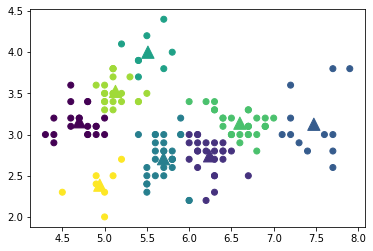

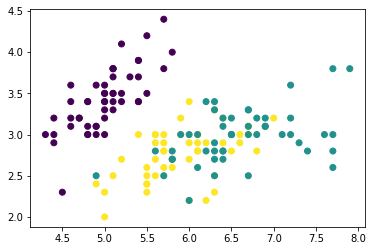

In [12]:
plt.scatter(X[:,0], X[:,1],c=labels.astype(float))
#plt.hold(True)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c = np.arange(num_clusters), marker = '^', s = 150)
plt.show()
plt.scatter(X[:,0], X[:,1],c=np.choose(y,[0,2,1]).astype(float))
plt.show()
# centroids of clusters shown as triangles

### Within Cluster Sum of Squares (WSS variance)

In [13]:
model.inertia_ # WSS variance for k=8

12.843135057471263

### Calculating WSS for other values of K - Elbow Method

In [14]:
wss =[]  # empty list

In [15]:
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(X)  # fit data to the k-means model
    wss.append(KM.inertia_)

In [16]:
wss # WSS reduces as K keeps increasing

[58.204092789066756,
 37.0507021276596,
 27.990212038303703,
 21.00466066066067,
 17.438309523809526,
 14.815831630102675,
 12.751743561036667,
 11.30144537346711,
 9.748652163258198]

In [17]:
a=[2,3,4,5,6,7,8,9,10]

<AxesSubplot:>

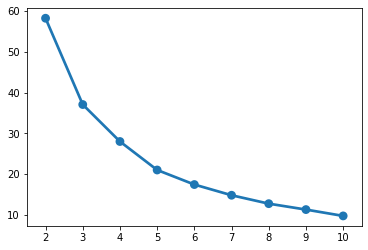

In [20]:
# wss vs k plot # wss stands for variance within the cluster
import seaborn as sns
sns.pointplot(x=a, y=wss)

Gaussian Mixture Model
======================
Example taken from [here](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_classifier.html#example-mixture-plot-gmm-classifier-py).

Define a visualization function
---

In [9]:
def make_ellipses(gmm, ax): # Why ellipse shape: for 2-dimension contour of the gaussian 
    """
    Visualize the gaussians in a GMM as ellipses
    """
    for n, color in enumerate('rgb'):
        v, w = np.linalg.eigh(gmm._get_covars()[n][:2, :2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *= 9
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

Load dataset and make training and test splits
---

In [10]:
iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(iris.target, n_folds=4)
# Only take the first fold.
train_index, test_index = next(iter(skf))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

Train and compare different GMMs
---

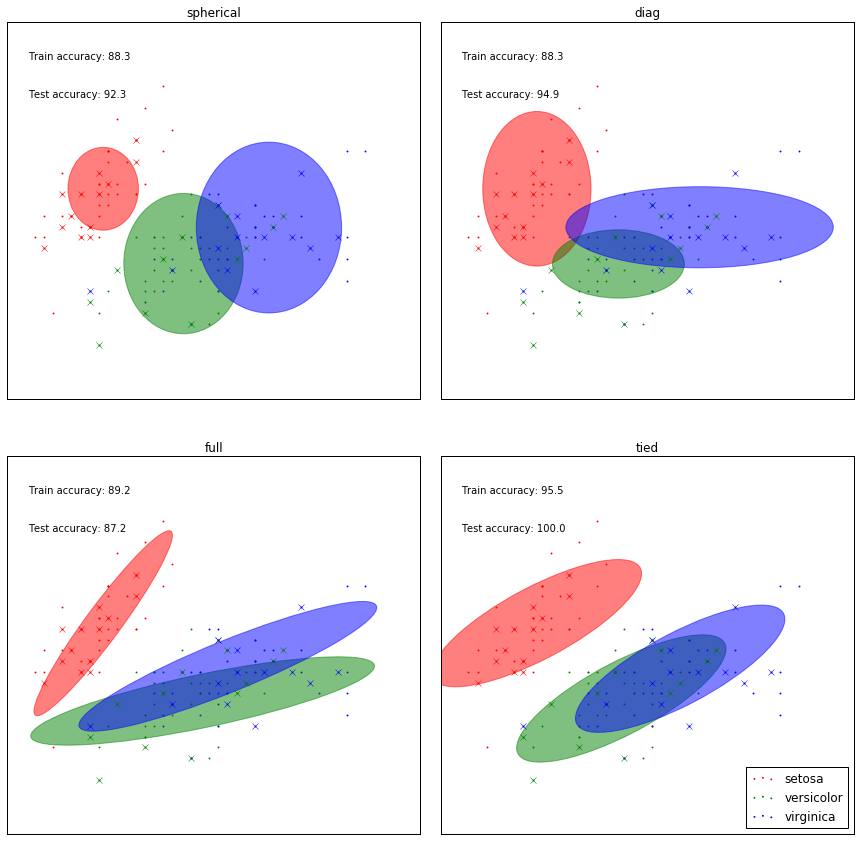

In [11]:
# Try GMMs using different types of covariances.
classifiers = dict((covar_type, GMM(n_components=n_classes,
                    covariance_type=covar_type, init_params='wc', n_iter=20))
                   for covar_type in ['spherical', 'diag', 'tied', 'full'])

n_classifiers = len(classifiers)

plt.figure(figsize=(2*3 * n_classifiers / 2, 2*6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, classifier) in enumerate(classifiers.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    classifier.means_ = np.array([X_train[y_train == i].mean(axis=0)
                                  for i in xrange(n_classes)])

    # Train the other parameters using the EM algorithm.
    classifier.fit(X_train)

    h = plt.subplot(2, n_classifiers / 2, index + 1)
    make_ellipses(classifier, h)

    for n, color in enumerate('rgb'):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], 0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate('rgb'):
        data = X_test[y_test == n]
        plt.plot(data[:, 0], data[:, 1], 'x', color=color)

    y_train_pred = classifier.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = classifier.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(loc='lower right', prop=dict(size=12))


plt.show()

Hierarchical Agglomerative Clustering
=====================================
Example taken from [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html#example-cluster-plot-digits-linkage-py).

Load and pre-process dataset
---

In [12]:
digits = datasets.load_digits(n_class=10) # digit images (8x8 size = 64 dimensions)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y): # increasing the size of datasets
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)

Visualize the clustering
---

In [13]:
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(2*6, 2*4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

Create a 2D embedding of the digits dataset
---

In [14]:
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X) # reducing the dimensionality from 64 to 2 via manifold learning
print("Done.")
# two print statements (one at the begining and one at the end) ensures that the task is done

Computing embedding
Done.


Train and visualize the clusters
---
* __Ward__ minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
* __Maximum or complete linkage__ minimizes the maximum distance between observations of pairs of clusters.
* __Average linkage__ minimizes the average of the distances between all observations of pairs of clusters.

ward : 19.58s
average : 18.85s
complete : 18.85s


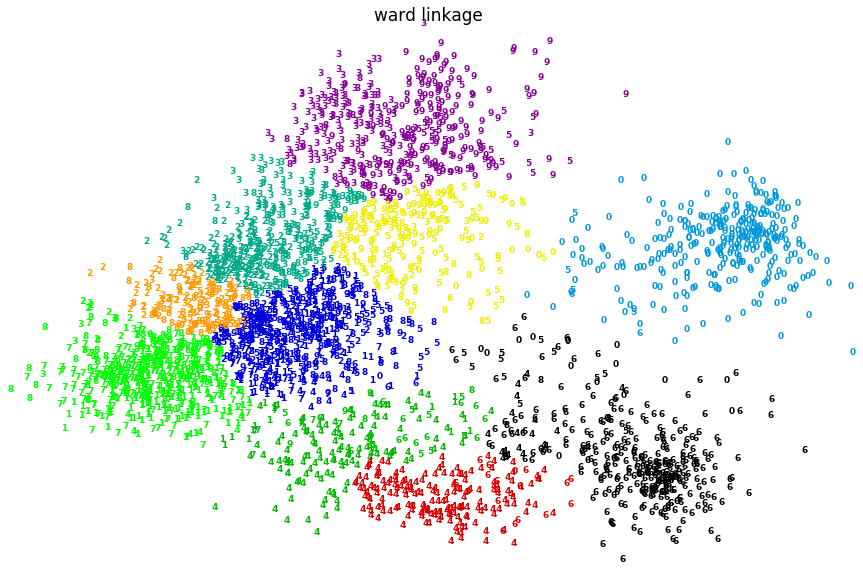

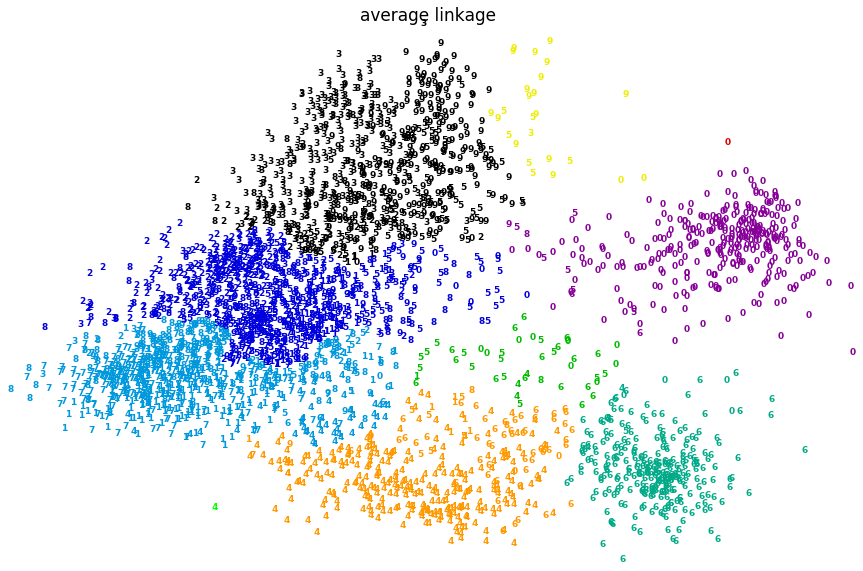

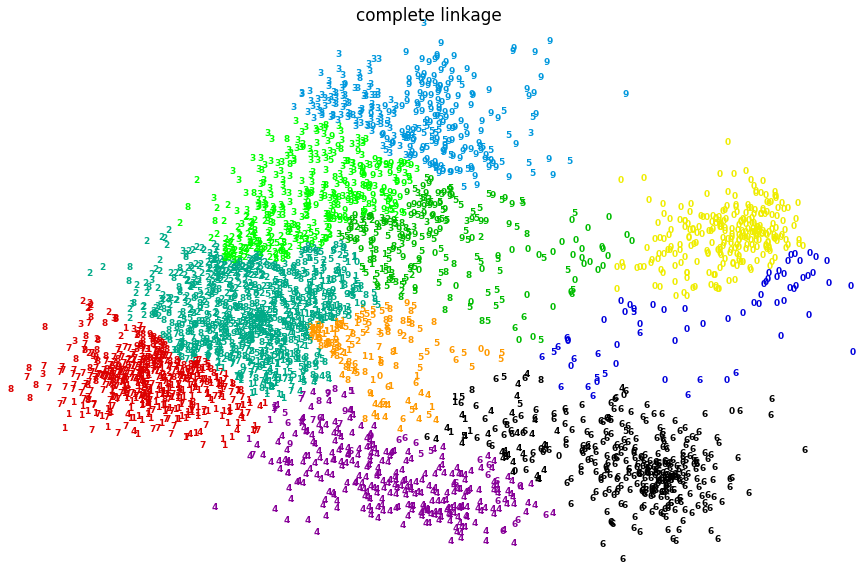

In [15]:
from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()